### Linear regression using Boston Housing dataset

In [63]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

import sklearn

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 

In [3]:
df_train = pd.read_csv('trainHousing.csv')

In [4]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.97617,0.0,21.89,0,0.624,5.757,98.4,2.3460,4,437,21.2,262.76,17.31,15.6
1,0.07875,45.0,3.44,0,0.437,6.782,41.1,3.7886,5,398,15.2,393.87,6.68,32.0
2,0.04590,52.5,5.32,0,0.405,6.315,45.6,7.3172,6,293,16.6,396.90,7.60,22.3
3,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,12.7
4,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5


In [5]:
df_test = pd.read_csv('testHousing.csv')

In [6]:
df_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,NaN


In [14]:
vars = list(df_train.columns)

CRIM


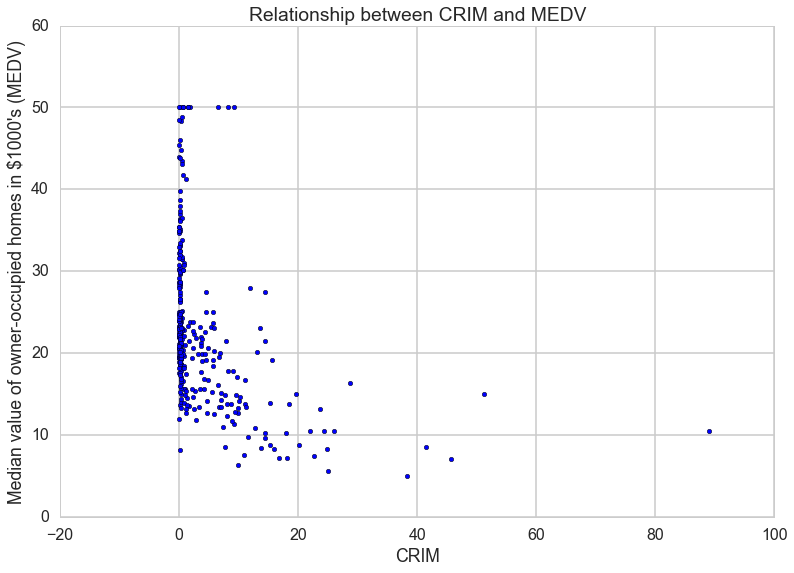

ZN


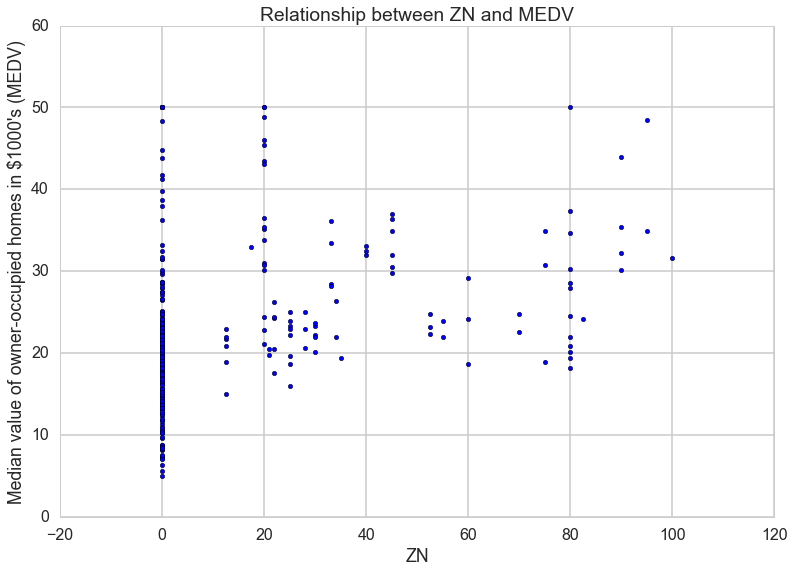

INDUS


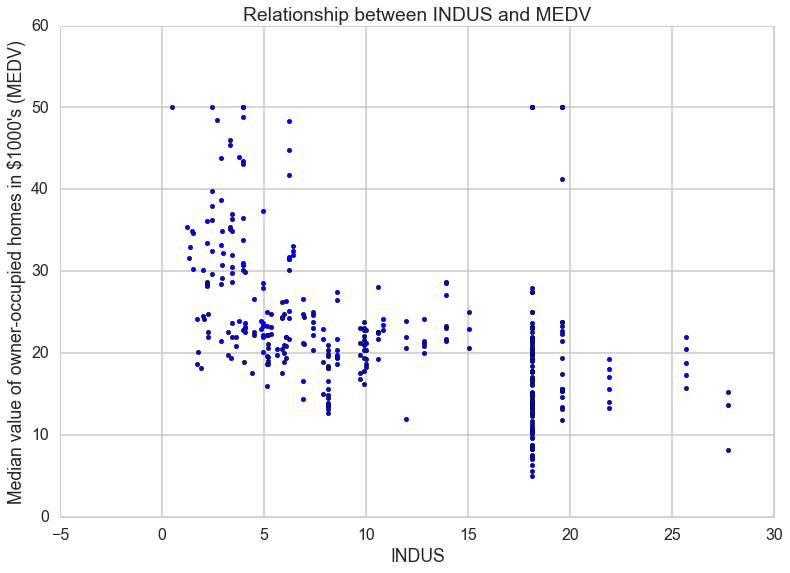

CHAS


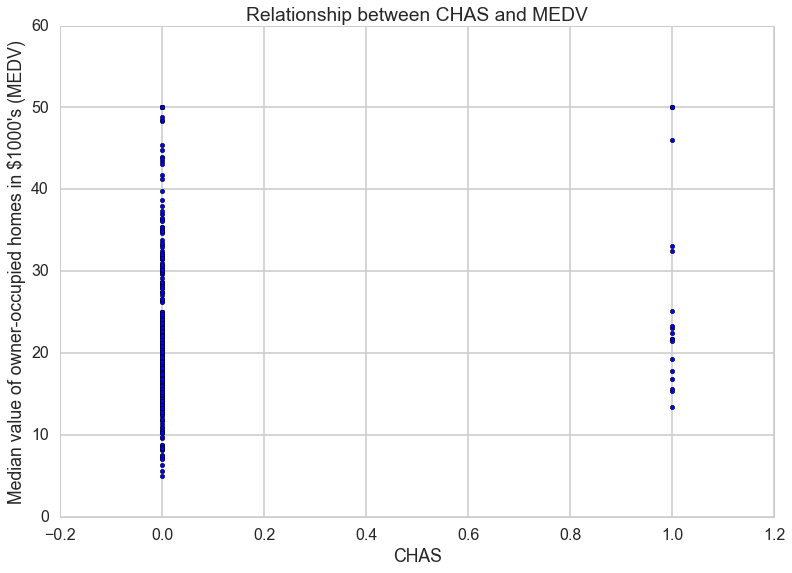

NOX


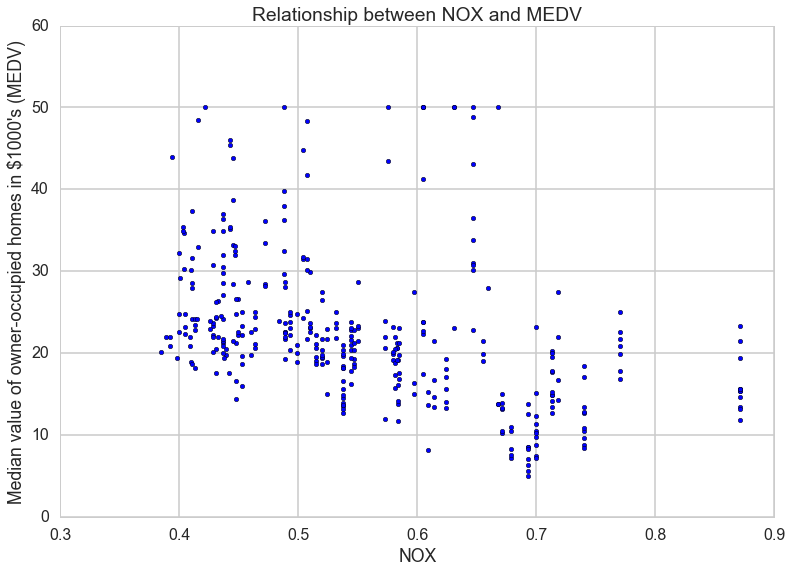

RM


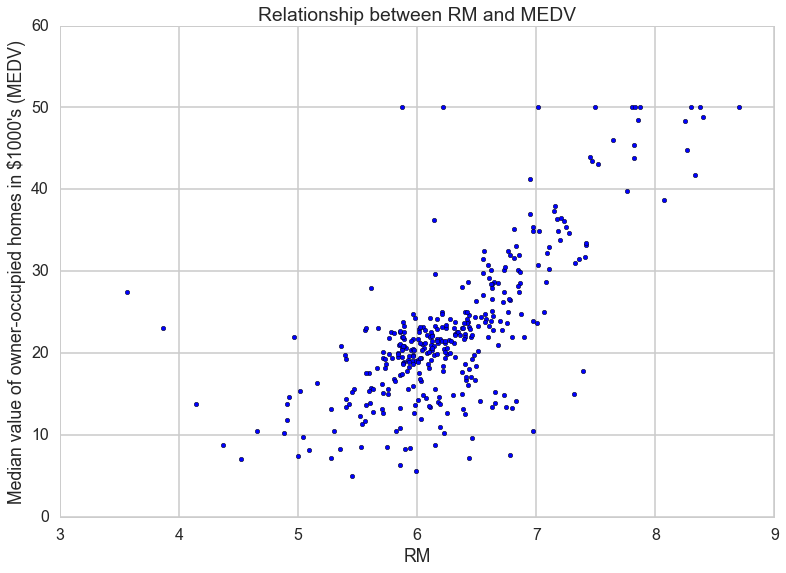

AGE


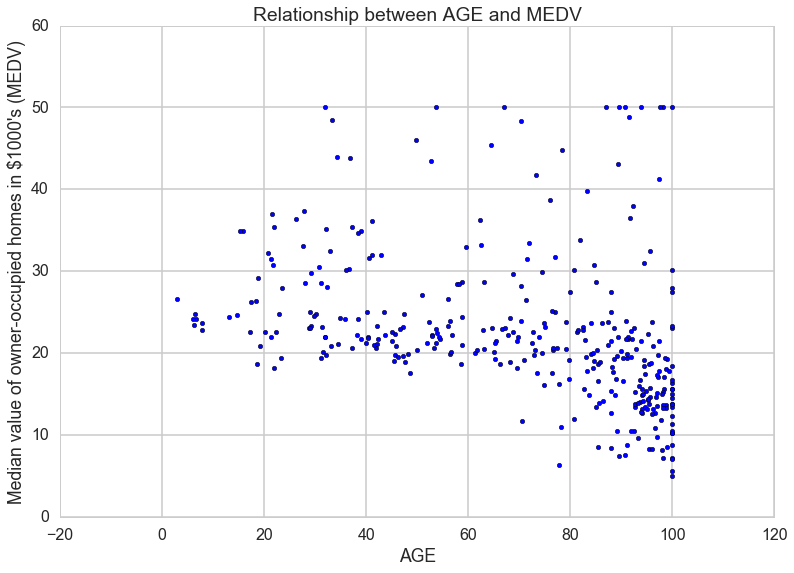

DIS


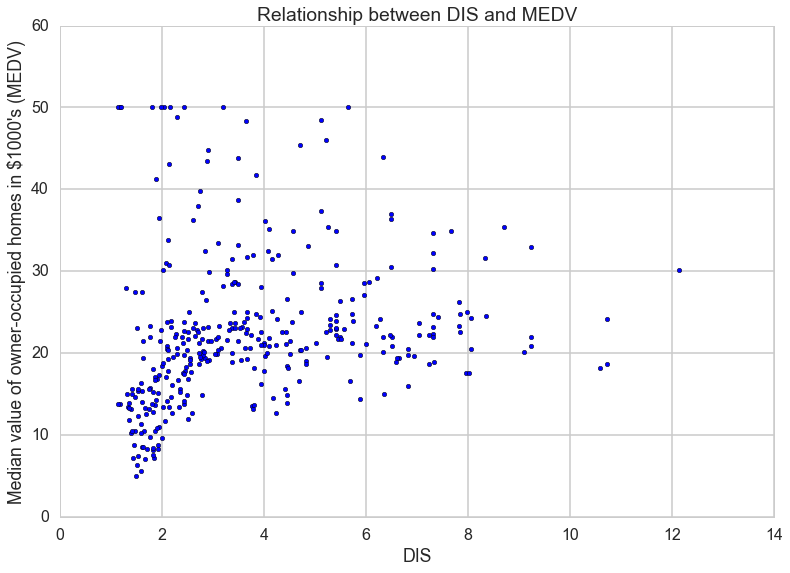

RAD


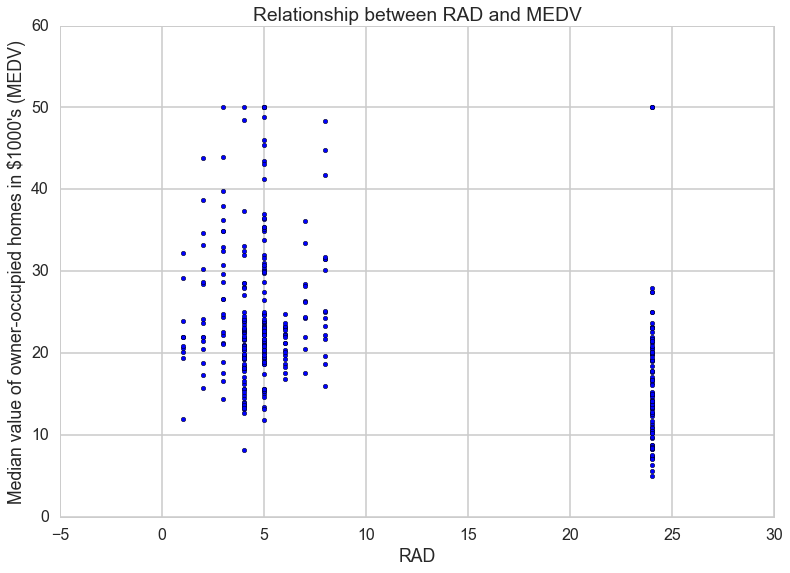

TAX


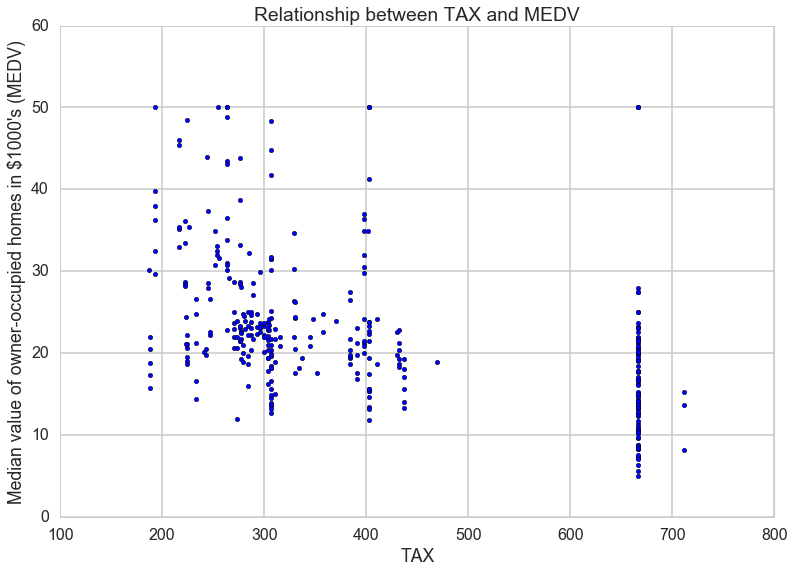

PTRATIO


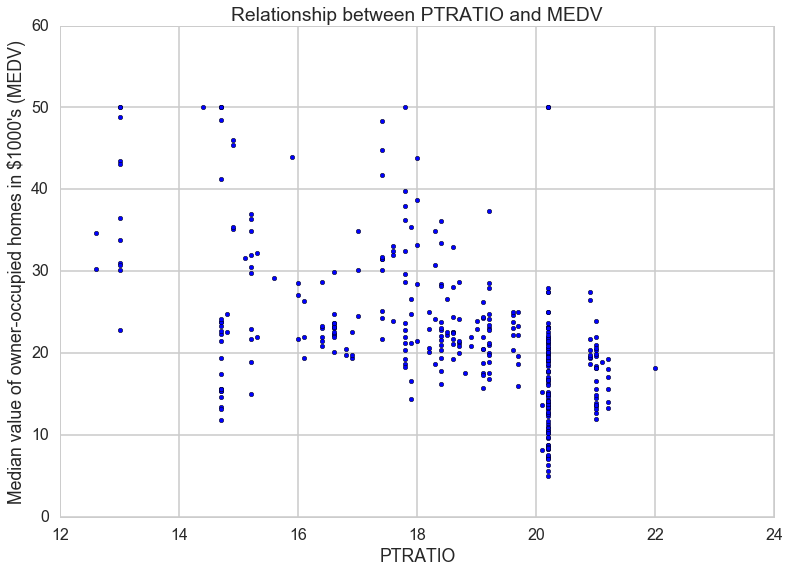

B


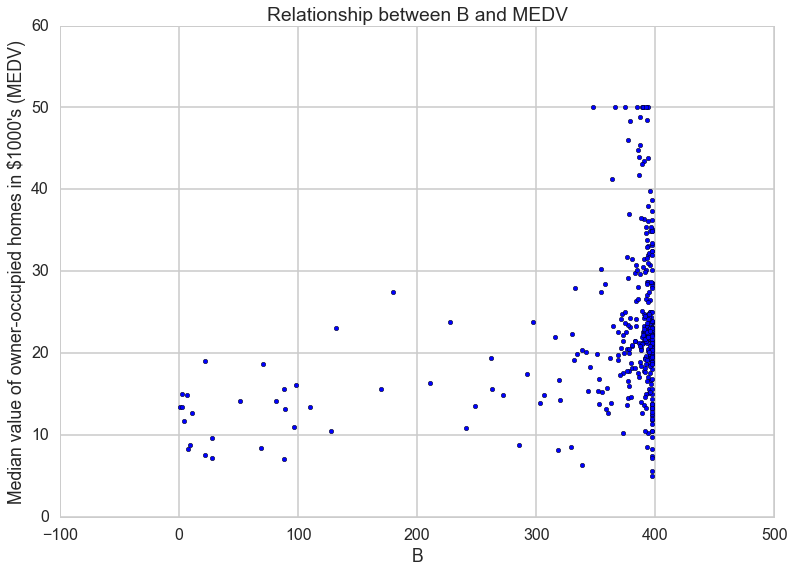

LSTAT


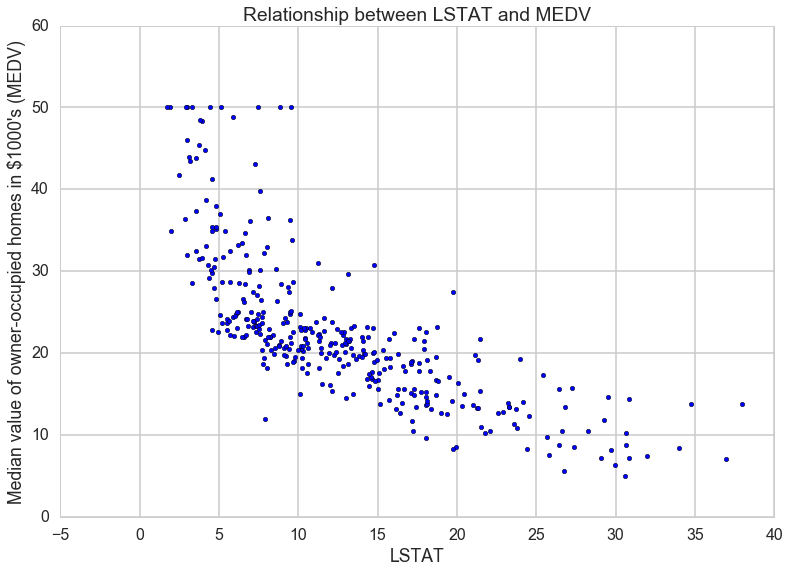

In [20]:
for var in vars[:-1]:
    print(var)
    plt.scatter(df_train[var], df_train.MEDV)
    plt.xlabel(var)
    plt.ylabel("Median value of owner-occupied homes in $1000's (MEDV)")
    plt.title("Relationship between {} and MEDV".format(var))
    plt.show()

The variables with a significant positive or negative linear correlations with MEDV are RM, CRIM, LSTAT and to a lesser extent PTRATIO,DIS, INDUS and NOX.

# OLS using statsmodels

In [25]:
model = ols('MEDV ~ RM',df_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     378.9
Date:                Fri, 30 Dec 2016   Prob (F-statistic):           8.33e-58
Time:                        11:59:42   Log-Likelihood:                -1157.7
No. Observations:                 354   AIC:                             2319.
Df Residuals:                     352   BIC:                             2327.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -36.9569      3.075    -12.017      0.0

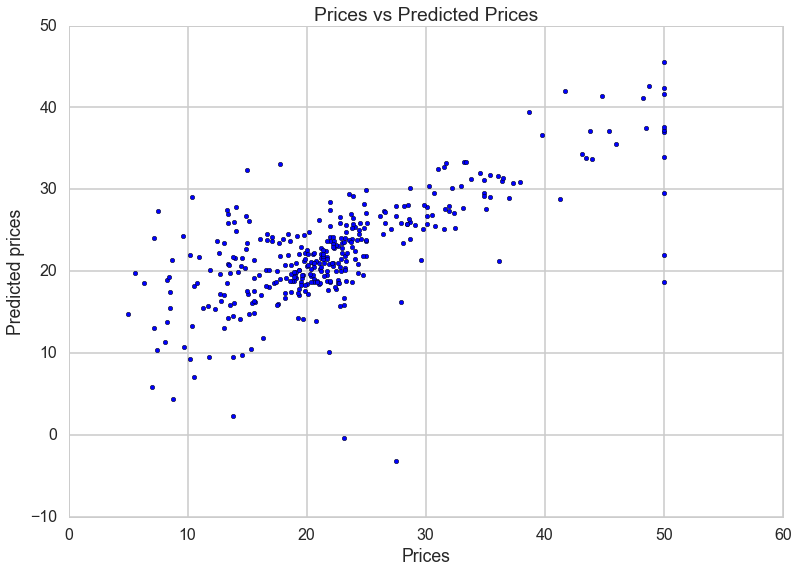

In [26]:
plt.scatter(df_train.MEDV,model.fittedvalues)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted Prices")
plt.show()

In [44]:
#multiple regression
model2 = ols('MEDV ~ RM + CRIM + LSTAT',df_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     233.3
Date:                Fri, 30 Dec 2016   Prob (F-statistic):           3.89e-83
Time:                        12:41:26   Log-Likelihood:                -1092.6
No. Observations:                 354   AIC:                             2193.
Df Residuals:                     350   BIC:                             2209.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.1708      3.718     -1.391      0.1

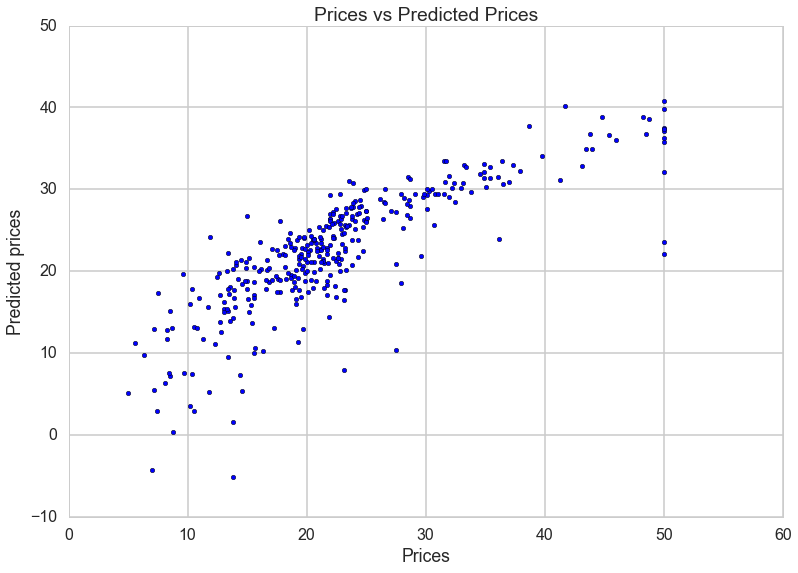

In [45]:
plt.scatter(df_train.MEDV,model2.fittedvalues)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted Prices")
plt.show()

In [93]:
model21 = ols('MEDV ~ RM + CRIM + PTRATIO',df_train).fit()
print(model21.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     189.6
Date:                Fri, 30 Dec 2016   Prob (F-statistic):           5.34e-73
Time:                        13:50:31   Log-Likelihood:                -1116.2
No. Observations:                 354   AIC:                             2240.
Df Residuals:                     350   BIC:                             2256.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.6111      4.735     -1.185      0.2

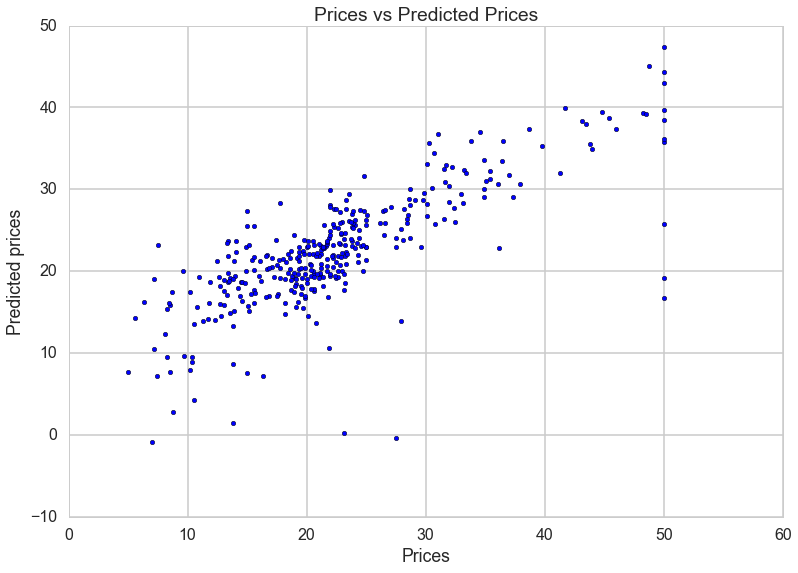

In [94]:
plt.scatter(df_train.MEDV,model21.fittedvalues)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted Prices")
plt.show()

In [30]:
#multiple regression
model3 = ols('MEDV ~ RM + CRIM + PTRATIO + DIS + INDUS +NOX',df_train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     110.5
Date:                Fri, 30 Dec 2016   Prob (F-statistic):           2.12e-77
Time:                        12:03:13   Log-Likelihood:                -1098.0
No. Observations:                 354   AIC:                             2210.
Df Residuals:                     347   BIC:                             2237.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     18.4971      6.173      2.997      0.0

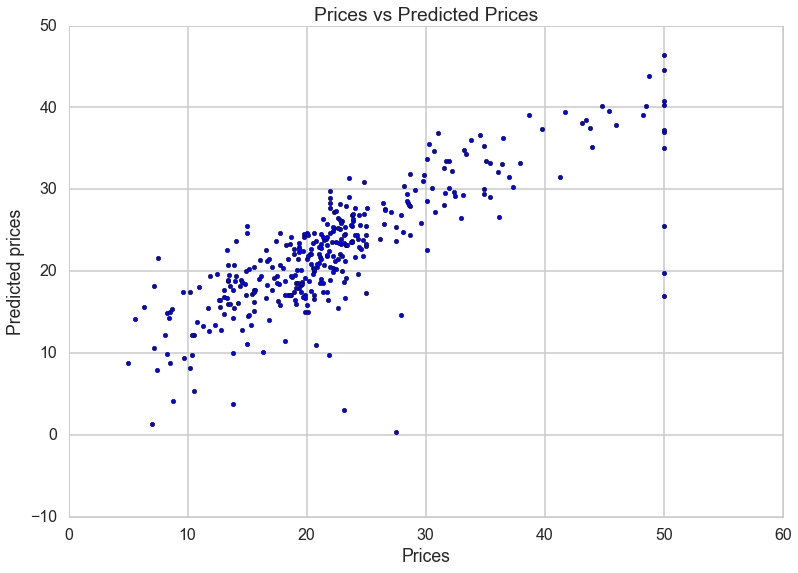

In [31]:
plt.scatter(df_train.MEDV,model3.fittedvalues)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted Prices")
plt.show()

In [46]:
#multiple regression
model4 = ols('MEDV ~ RM + CRIM + LSTAT+ PTRATIO + DIS + INDUS +NOX',df_train).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     137.3
Date:                Fri, 30 Dec 2016   Prob (F-statistic):           7.71e-96
Time:                        12:42:32   Log-Likelihood:                -1051.8
No. Observations:                 354   AIC:                             2120.
Df Residuals:                     346   BIC:                             2151.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.1722      5.641      6.058      0.0

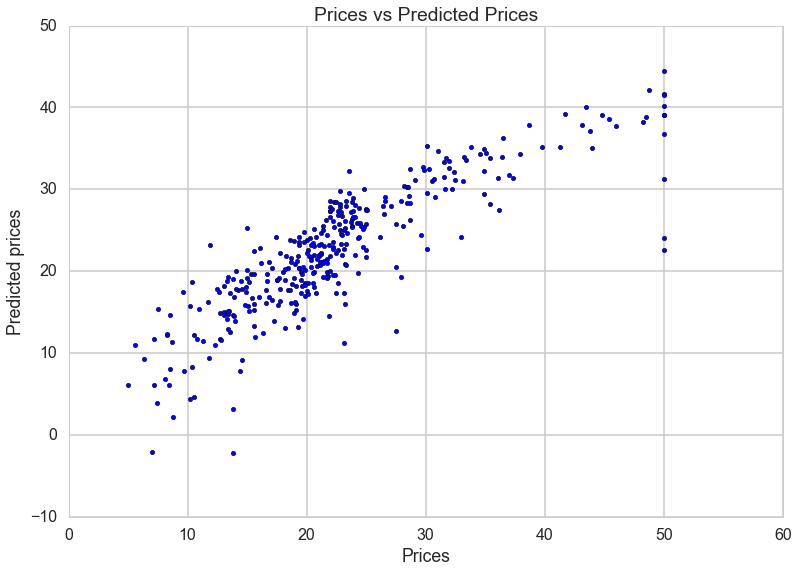

In [47]:
plt.scatter(df_train.MEDV,model4.fittedvalues)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted Prices")
plt.show()

The model is robust (not too sensitive to number of variables). Most points lie on the 45 degrees line. There are a few outliers. Notably model predicts price below zero for some points and underestimates house prices at the higher end of the price range.

In [33]:
df_test2 = df_test.copy()

In [35]:
df_test2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,NaN


In [38]:
df_test2['MEDV'] = model3.predict(df_test2).round(2)

In [39]:
df_test2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,29.63
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,25.67
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,30.79
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,28.16
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,29.16


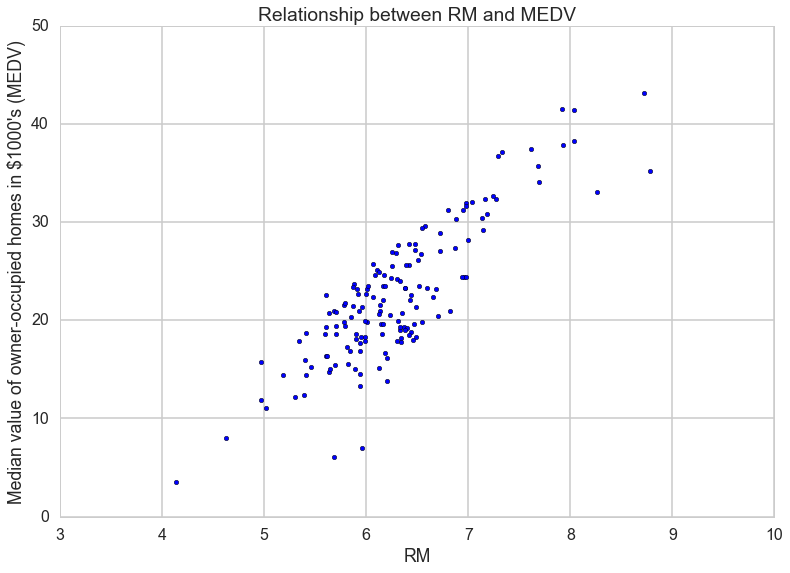

In [64]:
plt.scatter(df_test2.RM, df_test2.MEDV)
plt.xlabel('RM')
plt.ylabel("Median value of owner-occupied homes in $1000's (MEDV)")
plt.title("Relationship between RM and MEDV")
plt.show()

In [43]:
df_test2.to_csv('test.csv')

# OLS with sklearn

In [49]:
X = df_train.drop('MEDV', axis =1) # drop the MEDV column from the df_train datasets
lm = LinearRegression() #linear model

In [54]:
lm.fit(X,df_train.MEDV)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
lm.coef_, lm.intercept_

(array([ -9.96183947e-02,   4.45069941e-02,  -2.46349827e-02,
          3.73591615e+00,  -1.64971768e+01,   3.84068099e+00,
          4.49430333e-03,  -1.53913490e+00,   3.21915926e-01,
         -1.05971318e-02,  -1.01937420e+00,   9.33715757e-03,
         -5.62590100e-01]), 36.700978690239268)

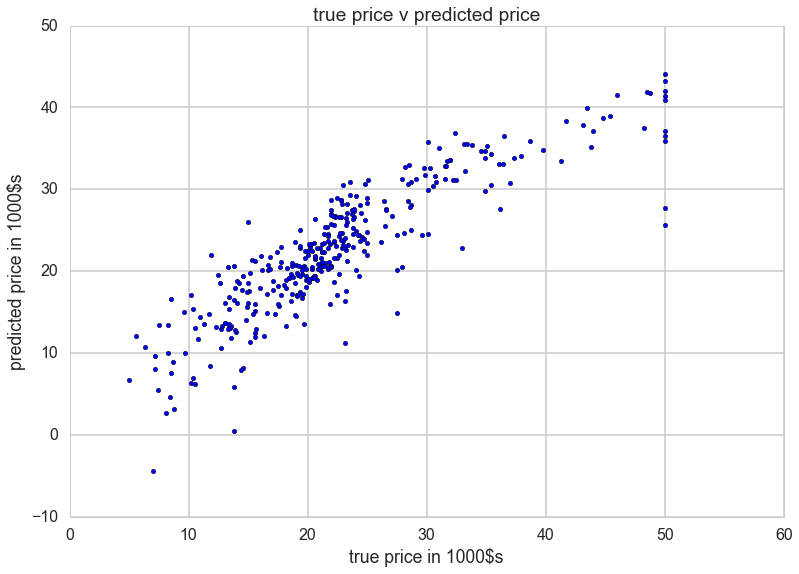

In [68]:
plt.scatter(df_train.MEDV, lm.predict(X))
plt.xlabel('true price in 1000$s')
plt.ylabel('predicted price in 1000$s')
plt.title('true price v predicted price')

In [79]:
#Using only a few variables
lm2 = LinearRegression()
lm2.fit(X[['CRIM','RM','PTRATIO','DIS','INDUS','NOX']], df_train.MEDV)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

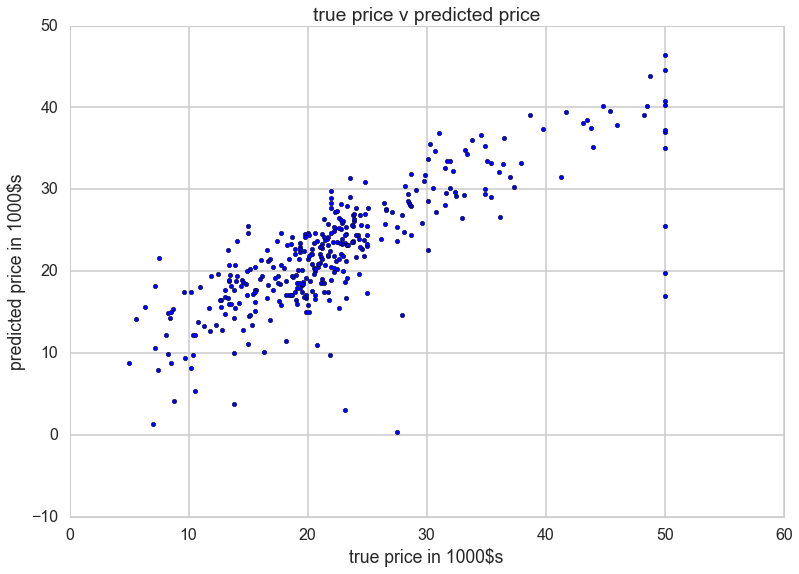

In [80]:
plt.scatter(df_train.MEDV, lm2.predict(X[['CRIM','RM','PTRATIO','DIS','INDUS','NOX']]))
plt.xlabel('true price in 1000$s')
plt.ylabel('predicted price in 1000$s')
plt.title('true price v predicted price')

In [81]:
lm2.score(X[['CRIM','RM','PTRATIO','DIS','INDUS','NOX']], df_train.MEDV )

0.65640329125271546

In [82]:
#F-statistic and p-value
f_regression(X[['CRIM','RM','PTRATIO','DIS','INDUS','NOX']],df_train.MEDV )

(array([  63.5785752 ,  378.91667964,  133.27239811,   17.88541067,
         110.4190182 ,   71.42545128]),
 array([  2.17790663e-14,   8.33015726e-58,   2.31124309e-26,
          2.99468563e-05,   1.20436162e-22,   7.72211511e-16]))

In [83]:
X_test = df_test.drop('MEDV', axis =1) # drop the MEDV column from the df_test datasets

In [87]:
df_test3 = df_test.copy()

In [88]:
df_test3['MEDV'] = lm2.predict(X_test[['CRIM','RM','PTRATIO','DIS','INDUS','NOX']]).round(2)

In [89]:
df_test3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,29.63
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,25.67
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,30.79
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,28.16
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,29.16


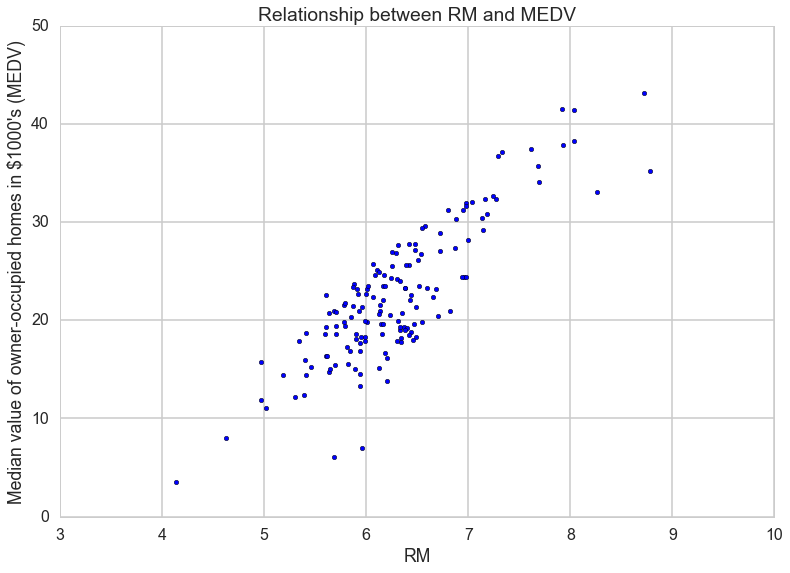

In [90]:
plt.scatter(df_test3.RM, df_test3.MEDV)
plt.xlabel('RM')
plt.ylabel("Median value of owner-occupied homes in $1000's (MEDV)")
plt.title("Relationship between RM and MEDV")
plt.show()

In [92]:
df_test3.to_csv('test2.csv')